In [101]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal
from skimage.restoration import wiener, richardson_lucy
from juanfit import SpectrumFitSingle,gaussian

In [91]:
def myLorentzian1D(x, x_0, fwhm):
    return 1/(np.pi)*(fwhm/2.)/((fwhm/2.)**2 + (x-x_0)**2)

In [92]:
wvl = np.linspace(0,60,301)

In [97]:
signal = gaussian(wvl,30,1,4.)

In [98]:
kernel_Lorentizan = myLorentzian1D(np.linspace(0,60,301),30.,4.8)

In [99]:
signal_convolved = np.convolve(signal, kernel_Lorentizan, mode="same")

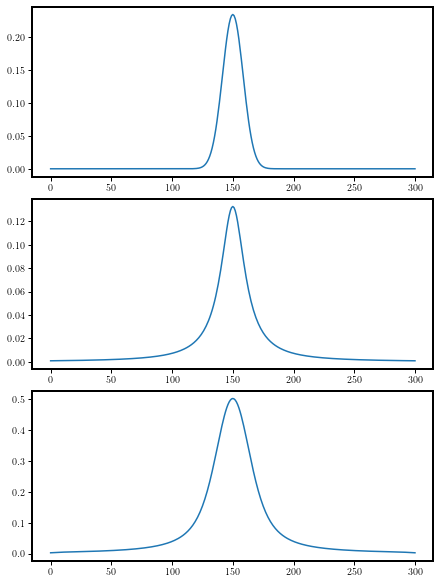

In [100]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,8),constrained_layout=True)

ax1.plot(signal)
ax2.plot(kernel_Lorentizan)
ax3.plot(signal_convolved)

<AxesSubplot:ylabel='Intensity'>

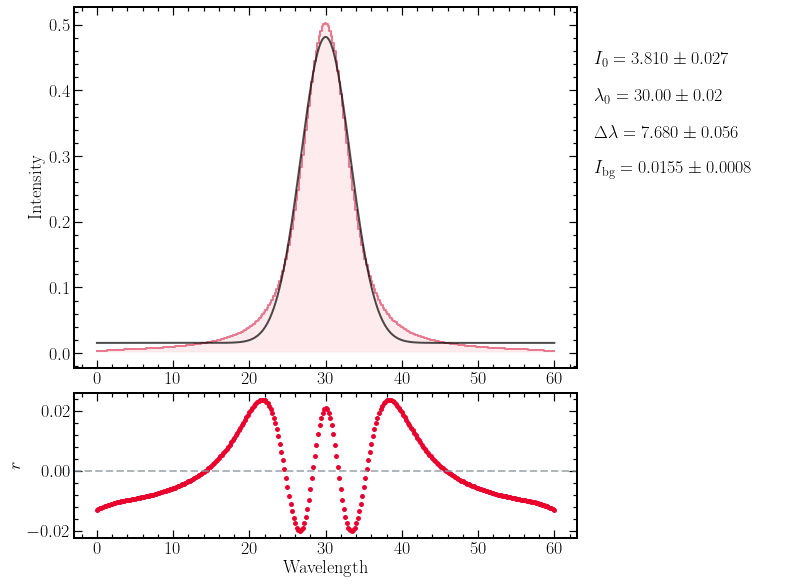

In [103]:
convolved_fitmodel = SpectrumFitSingle(signal_convolved, wvl=wvl,line_number=1,line_wvl_init=30,fwhm_init=4,int_max_init=0.5)
convolved_fitmodel.run_lse()
convolved_fitmodel.plot()